In [1]:

import time
import glob
import numpy as np
import pandas as pd
import numpy as np
from sglm.features import gen_signal_df as gsd
from sglm.features import build_features as bf
from sglm.features import setup_model_fit as smf
from sglm.models import sglm_cv
from sglm import models
from sglm.visualization import visualize
from sglm.models import train_model
from sglm.models import eval
from sglm import features

# fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig2-all-trial_all_bymouse.csv')
# fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig2-all-trial_abm_slOff.csv')
# fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig2-all-bidir_pred_words.csv')
# fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig2-all-bidir_pred_words.csv')
# fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig3_g2-all-bidir_pred_withwords.csv')
# fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig3_g2-all-bidir_pred_bidir.csv')
# fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig2-dualhem-all-dh.csv')

# fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig2-dualhem-all-gr-dual.csv')

# fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig2-dualhem-all-gr-dual-n62.csv')

# fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig3_g1-all-bidir-ctrl.csv')

# fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig3_g5-all-bidir-ctrl.csv')

# fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig3_g5-all-bidir-ctrl-nslO.csv')

fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig2-dualhem-all-DA-DA-pred.csv')


# fg2all = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig2-by_mouse-words-recons.csv')

In [2]:
fg2b = fg2[~fg2['mouse_id'].str.contains('_')].sort_values(['channel_name', 'Unnamed: 0']).groupby('channel_name').agg([np.mean, np.std, np.size]).stack(1).T

In [3]:
fg2[~fg2['mouse_id'].str.contains('_')]

,Unnamed: 0,mouse_id,channel_name,int,photometryCenterInIndex_-20,photometryCenterInIndex_-19,photometryCenterInIndex_-18,photometryCenterInIndex_-17,photometryCenterInIndex_-16,photometryCenterInIndex_-15,...,rDA_11,rDA_12,rDA_13,rDA_14,rDA_15,rDA_16,rDA_17,rDA_18,rDA_19,rDA_20
0,fig2-dualhem-by_mouse-DA-DA-pred_WT63_rDA_0,WT63,rDA_0,0.0,-0.017570,-0.002711,-0.041648,-0.015146,-0.012419,-0.054374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fig2-dualhem-by_mouse-DA-DA-pred_WT63_gDA_1,WT63,gDA_1,0.0,-0.024067,-0.017567,-0.022300,-0.012315,-0.008454,-0.011406,...,-0.008971,-0.003984,-0.001216,-0.002112,-0.001693,-0.002563,-0.001269,0.002079,0.001567,-0.003222
2,fig2-dualhem-by_mouse-DA-DA-pred_WT64_rDA_0,WT64,rDA_0,0.0,-0.013518,-0.021960,-0.031887,-0.059677,-0.076573,-0.088132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fig2-dualhem-by_mouse-DA-DA-pred_WT64_gDA_1,WT64,gDA_1,0.0,-0.024452,-0.011014,-0.009337,0.022243,0.015938,0.005829,...,-0.003556,-0.000482,-0.001562,-0.000676,0.001147,-0.003274,-0.005125,-0.002751,0.000871,-0.000862
4,fig2-dualhem-by_mouse-DA-DA-pred_WT65_rDA_0,WT65,rDA_0,0.0,-0.027234,-0.013853,-0.034359,0.003221,0.015656,-0.004076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,fig2-dualhem-by_mouse-DA-DA-pred_WT65_gDA_1,WT65,gDA_1,0.0,-0.153956,-0.161207,-0.159278,-0.150369,-0.157429,-0.169408,...,-0.007747,-0.004400,-0.002441,0.000189,0.001276,-0.001585,-0.003090,-0.001264,-0.004051,-0.006505


In [4]:
# channel_name
fg2all = fg2[~fg2['mouse_id'].str.contains('WT')].groupby('channel_name').mean().T.copy()

fg2cols = list(fg2all.columns)

fg2allcols = [_+'_all' for _ in fg2all.columns]
fg2all.columns = fg2allcols

In [5]:
fg2b[fg2allcols] = fg2all
# fg2b

In [6]:
# fg2

In [7]:
for col in fg2cols:
    fg2b[(col,'ci_u')] = fg2b[col]['mean'] + 1.96*fg2b[col]['std']/np.sqrt(fg2b[col]['size'])
    fg2b[(col,'ci_l')] = fg2b[col]['mean'] - 1.96*fg2b[col]['std']/np.sqrt(fg2b[col]['size'])

    # fg2b[('rDA','ci_u')] = fg2b['rDA']['mean'] + 1.96*fg2b['rDA']['std']/np.sqrt(fg2b['rDA']['size'])
    # fg2b[('rDA','ci_l')] = fg2b['rDA']['mean'] - 1.96*fg2b['rDA']['std']/np.sqrt(fg2b['rDA']['size'])

In [8]:
# import matplotlib.pyplot as plt
# # %matlplotlib notebook

# plt.figure()
# fg2b['gACH']['ci_u'].plot()
# fg2b['gACH']['mean'].plot()
# fg2b['gACH']['ci_l'].plot()

In [9]:
import matplotlib.pyplot as plt

In [10]:
# fg2b['base'] = fg2b.reset_index()['index'].str.split('_').apply(lambda x: x[0]).values
# fg2b['sft'] = fg2b.reset_index()['index'].str.split('_').apply(lambda x: x[1] if len(x) > 1 else x[0]).values

# base_filters = [_ for _ in fg2b['base'].unique() if _ != 'int']



# def coeff_ci_plot(base_filters, x_col='sft', all_fit='all', mean_col='mean', lb_col='ci_l', ub_col='ci_u', channel='gACH',
#                   num_cols=4, figsize=(20,20)):
    
#     num_rows = len(base_filters)//num_cols if len(base_filters)%num_cols == 0 else len(base_filters)//num_cols + 1

#     i = 0
#     j = 0
    
#     fig, ax = plt.subplots(num_rows, num_cols, figsize=figsize, facecolor='w')
#     fig.suptitle(channel)

#     for base in base_filters:
#         base_name = base.replace('photometry', '').replace('Index', '')
#         tmp = fg2b[fg2b['base'] == base]
#         ax[i,j].plot(tmp[x_col], tmp[f'{channel}_{all_fit}'], color='b', label='All')
#         ax[i,j].plot(tmp[x_col], tmp[channel][mean_col], color=channel[0], label='Mean By Mouse')
#         ax[i,j].fill_between(tmp[x_col], tmp[channel][lb_col], tmp[channel][ub_col], color=channel[0], alpha=.2, label='CI')
#         ax[i,j].set_title(f'{channel} — {base_name}')

#         if (j+1)%4 < j%4:
#             i += 1
#             j = 0
#         else:
#             j += 1

#     ax[0,num_cols-1].legend()

# coeff_ci_plot(base_filters, x_col='sft', all_fit='all', mean_col='mean', lb_col='ci_l', ub_col='ci_u', channel='gACH',
#                   num_cols=4, figsize=(20,20))
# coeff_ci_plot(base_filters, x_col='sft', all_fit='all', mean_col='mean', lb_col='ci_l', ub_col='ci_u', channel='rDA',
#                   num_cols=4, figsize=(20,20))

# # i = 0
# # j = 0
# # channel = 'rDA'
# # fig.suptitle(channel)
# # fig, ax = plt.subplots(num_rows, 4, figsize=(20,20))
# # for base in bases:
# #     base_name = base.replace('photometry', '').replace('Index', '')
# #     tmp = fg2b[fg2b['base'] == base]

# #     ax[i,j].plot(tmp['sft'], tmp['rDA_all'], color='b', label='All')
# #     ax[i,j].plot(tmp['sft'], tmp[channel]['mean'], color=channel[0], label='Mean By Mouse')
# #     ax[i,j].fill_between(tmp['sft'], tmp[channel]['ci_l'], tmp[channel]['ci_u'], color=channel[0], alpha=.2, label='CI')
# #     ax[i,j].set_title(f'channel — {base_name}')

# #     if (j+1)%4 < j%4:
# #         i += 1
# #         j = 0
# #     else:
# #         j += 1

# # ax[0,3].legend()

In [11]:
# fg2b

In [12]:
# fg2[[_ for _ in fg2.columns if 'rDA' in _]]

Checking: photometryCenterInIndex
Checking: sl
Checking: photometrySideInIndexr
Checking: photometrySideInIndexnr
Checking: photometrySideOutIndex
Checking: spnnrOff
Checking: gDA
Checking: rDA
Checking: photometryCenterInIndex
Checking: sl
Checking: photometrySideInIndexr
Checking: photometrySideInIndexnr
Checking: photometrySideOutIndex
Checking: spnnrOff
Checking: gDA
Checking: rDA


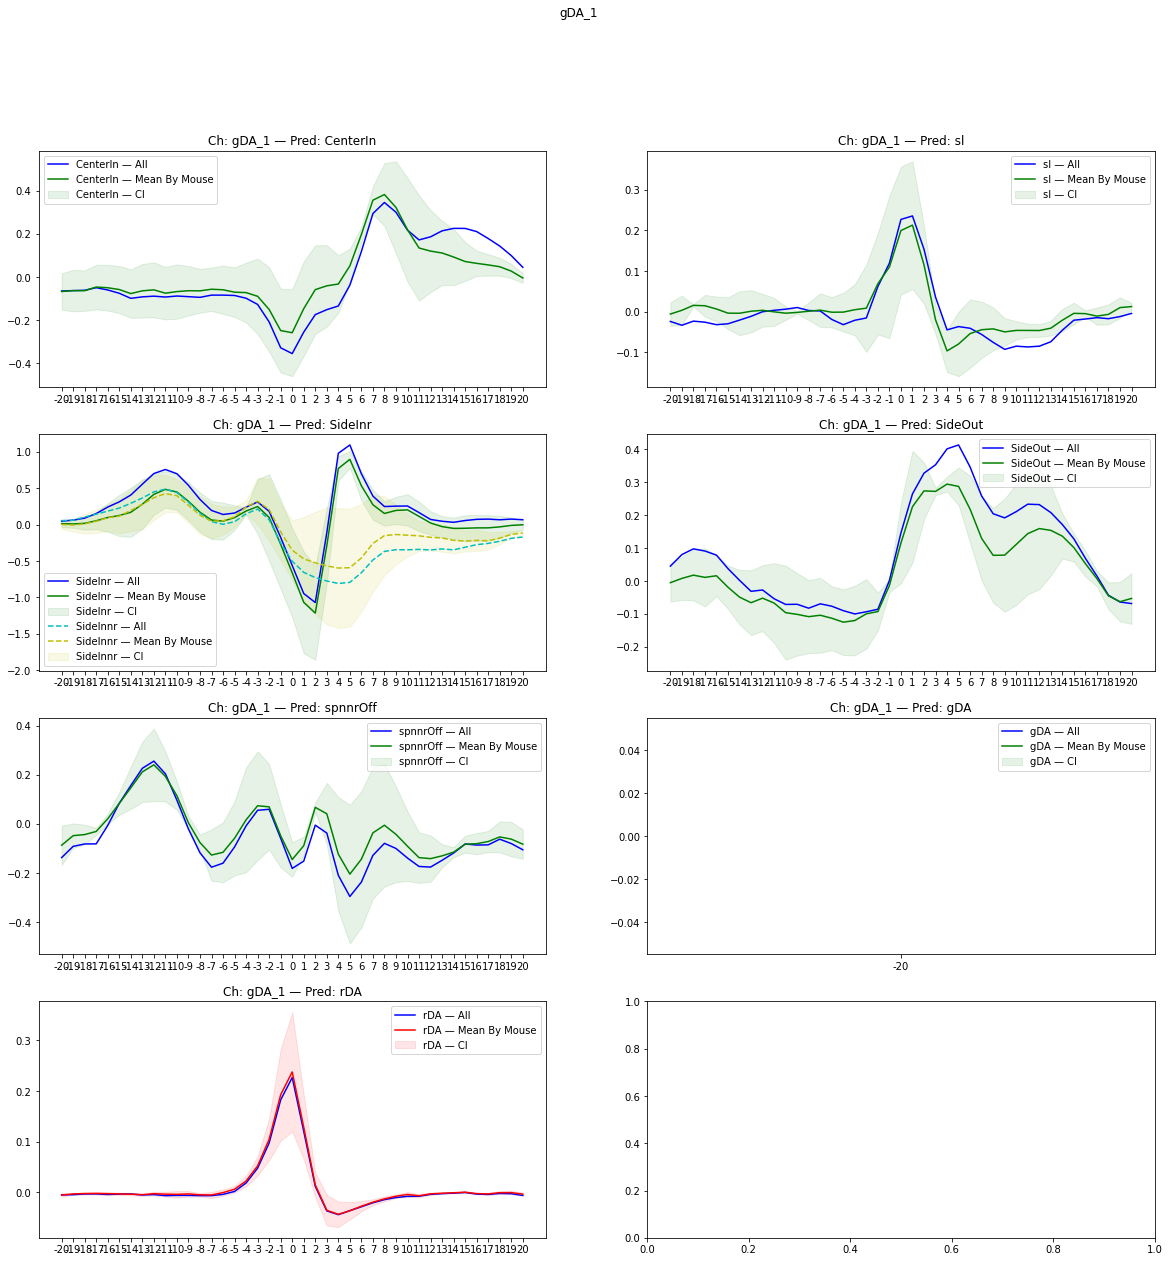

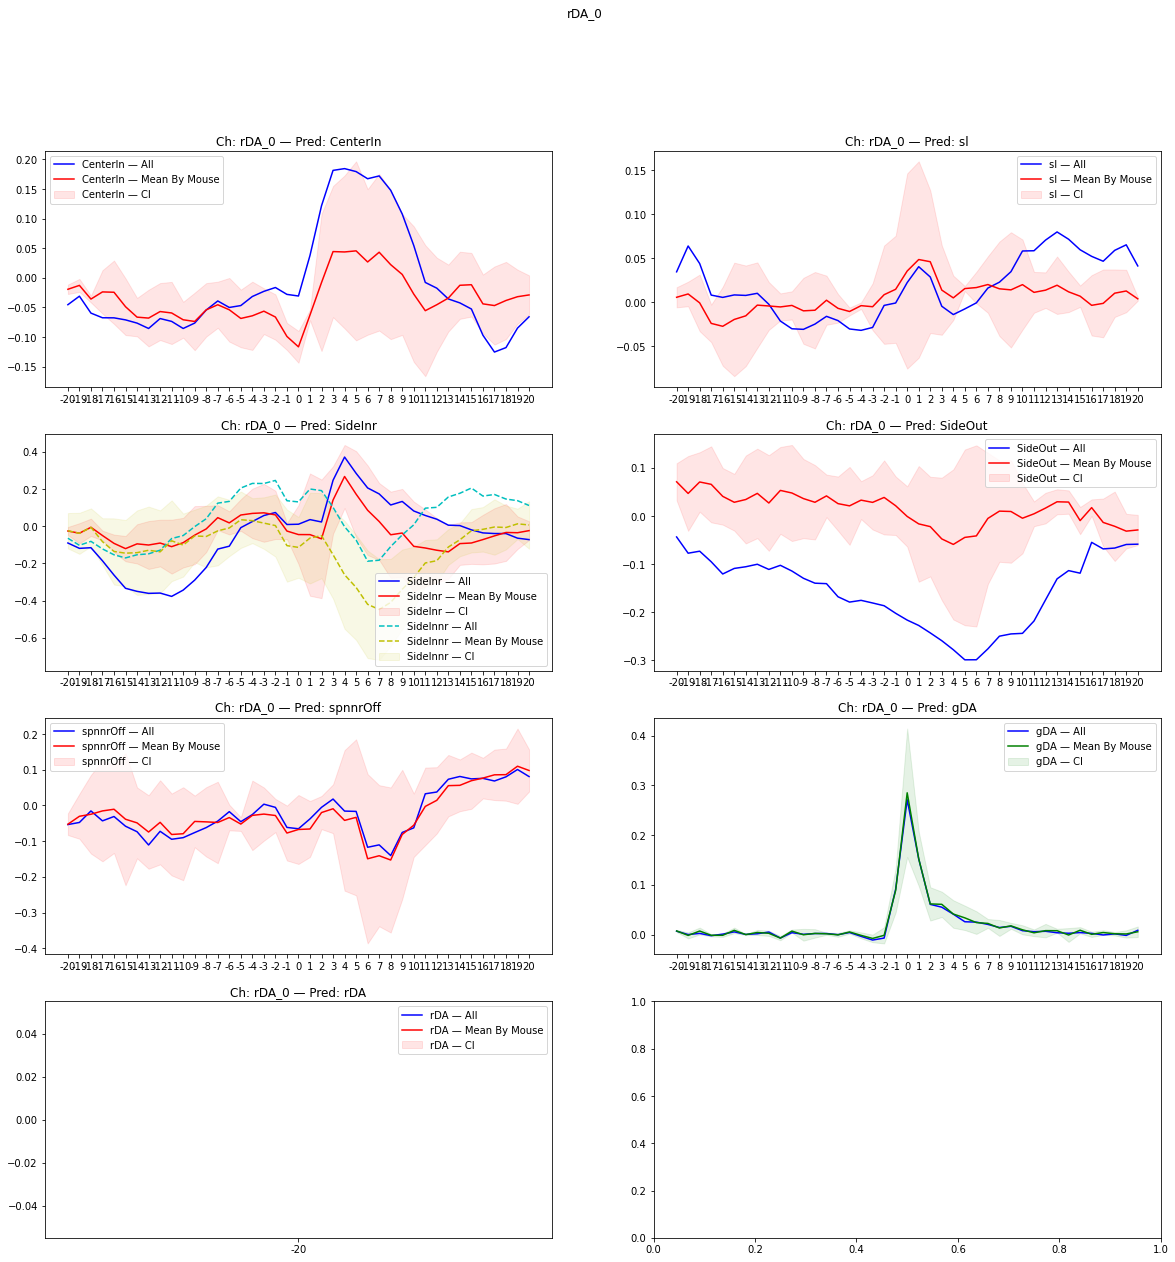

In [13]:
fg2b['base'] = fg2b.reset_index()['index'].str.split('_').apply(lambda x: x[0]).values
fg2b['sft'] = fg2b.reset_index()['index'].str.split('_').apply(lambda x: x[1] if len(x) > 1 else x[0]).values

base_filters = [_ for _ in fg2b['base'].unique() if _ != 'int']

def plot_num_to_ij(plot_num, num_rows, num_cols):
    i = plot_num // num_cols
    j = plot_num % num_cols
    return i, j

def coeff_ci_plot2(base_filters, x_col='sft', all_fit='all', mean_col='mean', lb_col='ci_l', ub_col='ci_u', channel='gACH',
                  num_cols=2, figsize=(20,20)):
    

    i = 0
    j = 0

    plot_number = 0
    plot_number_dct = {}
    prv_key = ''
    for key in base_filters:
        print('Checking:', key)
        if prv_key:
            if key[:-1] == prv_key[:-1] and abs(ord(key[-1]) - ord(prv_key[-1])) == 32:
                pass
            elif key[:-1] == prv_key[:-2] and (key[-1:] == 'r' and key[-2:] != 'nr' and prv_key[-2:] == 'nr'):
                pass
            elif key[:-2] == prv_key[:-1] and (prv_key[-1:] == 'r' and prv_key[-2:] != 'nr' and key[-2:] == 'nr'):
                pass
            else:
                plot_number += 1
        
        prv_key = key
        plot_number_dct[key] = plot_number
    
    num_rows = plot_number//num_cols + 1 if plot_number%num_cols == 0 else plot_number//num_cols + 1

    fig, ax = plt.subplots(num_rows, num_cols, figsize=figsize, facecolor='w')
    fig.suptitle(channel)

    prv_base = None

    for base in base_filters:
        i, j = plot_num_to_ij(plot_number_dct[base], num_rows, num_cols)

        base_name = base.replace('photometry', '').replace('Index', '')
        
        if (not prv_base or plot_number_dct[prv_base] != plot_number_dct[base]):
            linestyle = '-'
            color_basis = ('b', channel[0], channel[0]) 
            base_name_title = base_name
            ax[i,j].set_title(f'Ch: {channel} — Pred: {base_name_title}')

            if base[0] == 'r':
                color_basis = ('b', 'r', 'r') 
            elif base[0] == 'g':
                color_basis = ('b', 'g', 'g') 
            else:
                color_basis = ('b', channel[0], channel[0]) 


        else:
            linestyle = '--'
            if channel[0] == 'r':
                # color_basis = ('k', 'm', 'm')
                color_basis = ('c', 'y', 'y')
            else:
                # color_basis = ('k', 'c', 'c')
                color_basis = ('c', 'y', 'y')

            
            base_name_title = base_name[:-1]

        
        tmp = fg2b[fg2b['base'] == base]
        ax[i,j].plot(tmp[x_col], tmp[f'{channel}_{all_fit}'], color=color_basis[0], label=f'{base_name} — All', linestyle=linestyle)
        ax[i,j].plot(tmp[x_col], tmp[channel][mean_col], color=color_basis[1], label=f'{base_name} — Mean By Mouse', linestyle=linestyle)
        ax[i,j].fill_between(tmp[x_col], tmp[channel][lb_col], tmp[channel][ub_col], color=color_basis[2], alpha=.1, label=f'{base_name} — CI')
        
        prv_base = base

        ax[i,j].legend()

        # if (j+1)%4 < j%4:
        #     i += 1
        #     j = 0
        # else:
        #     j += 1

    # ax[0,num_cols-1].legend()

for col in fg2cols:
    coeff_ci_plot2(base_filters, x_col='sft', all_fit='all', mean_col='mean', lb_col='ci_l', ub_col='ci_u', channel=col,
                    num_cols=2, figsize=(20,20))
# coeff_ci_plot2(base_filters, x_col='sft', all_fit='all', mean_col='mean', lb_col='ci_l', ub_col='ci_u', channel='rDA',
#                   num_cols=2, figsize=(20,20))


In [14]:
# dct = { 'photometrySideInIndexAA':(0,0),
#         'photometrySideInIndexanr':(0,0), 'photometrySideInIndexar':(0,0),
#         'photometrySideInIndexAa':(0,0),
#         'photometrySideInIndexaA':(0,0), 'photometrySideInIndexaa':(0,0),
#         'photometrySideInIndexAB':(0,0), 'photometrySideInIndexAb':(0,0),
#         'photometrySideInIndexaB':(0,0), 'photometrySideInIndexab':(0,0),
#         'photometrySideInIndexbnr':(0,0), 'photometrySideInIndexcnr':(0,0),
#         'photometrySideInIndexcr':(0,0), 'photometrySideInIndexbr':(0,0),

#         }

# keys = list(dct.keys())
# 
# plot_number = 0
# plot_number_dct = {}
# prv_key = ''
# for key in keys:
#     print('Checking:', key)
#     if len(prv_key) != 0:
#         if key[:-1] == prv_key[:-1] and abs(ord(key[-1]) - ord(prv_key[-1])):
#             print('Combine!!! >>', prv_key, key)
#         elif key[:-1] == prv_key[:-2] and (key[-1:] == 'r' and key[-2:] != 'nr' and prv_key[-2:] == 'nr'):
#             print('Combine!!! >>', prv_key, key)
#         elif key[:-2] == prv_key[:-1] and (prv_key[-1:] == 'r' and prv_key[-2:] != 'nr' and key[-2:] == 'nr'):
#             print('Combine!!! >>', prv_key, key)
#         else:
#             print('Do not >>', prv_key, key)
    
#     prv_key = key

# plot_number = 0
# plot_number_dct = {}
# prv_key = ''
# for key in keys:
#     print('Checking:', key)
#     if len(prv_key) != 0:
#         if key[:-1] == prv_key[:-1] and abs(ord(key[-1]) - ord(prv_key[-1])):
#             print(plot_number, 'Combine!!! >>', prv_key, key)
#         elif key[:-1] == prv_key[:-2] and (key[-1:] == 'r' and key[-2:] != 'nr' and prv_key[-2:] == 'nr'):
#             print(plot_number, 'Combine!!! >>', prv_key, key)
#         elif key[:-2] == prv_key[:-1] and (prv_key[-1:] == 'r' and prv_key[-2:] != 'nr' and key[-2:] == 'nr'):
#             print(plot_number, 'Combine!!! >>', prv_key, key)
#         else:
#             print(plot_number, 'Do not >>', prv_key, key)
#             plot_number += 1
    
#     prv_key = key
#     plot_number_dct[key] = plot_number